In [12]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
%matplotlib inline

In [3]:
df = pd.read_csv("https://gist.githubusercontent.com/scscodes/830e2ee217913f55a44be99daaf542e4/raw/59f73a230de3aa3c020709e6e4d476e8dc563207/real-gdp.csv")

In [4]:
df.head()

,DATE,GDPC1
0,1990-01-01,10047.386
1,1990-04-01,10083.855
2,1990-07-01,10090.569
3,1990-10-01,9998.704
4,1991-01-01,9951.916


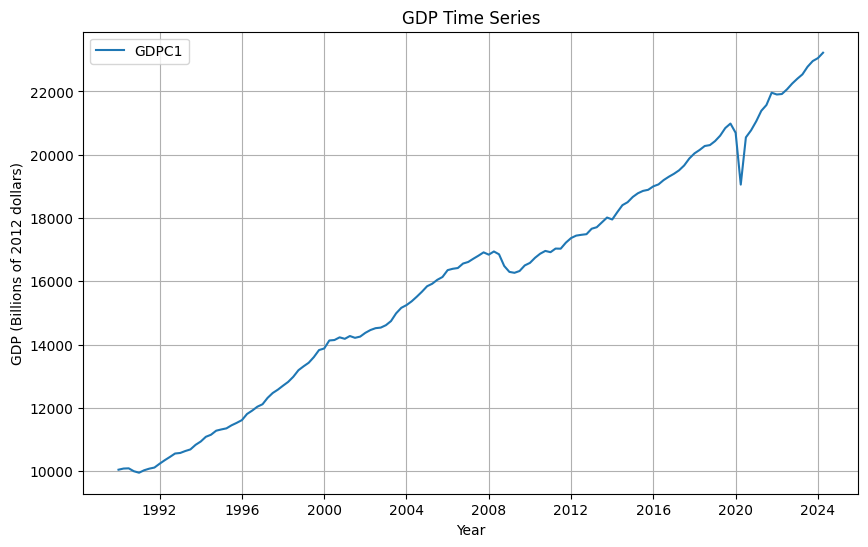

In [6]:
# Generic overview, should mirror the FRED plot

df['DATE'] = pd.to_datetime(df['DATE'])

# Set the 'DATE' column as the index
df.set_index('DATE', inplace=True)

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['GDPC1'], label='GDPC1')
plt.title('GDP Time Series')
plt.xlabel('Year')
plt.ylabel('GDP (Billions of 2012 dollars)')
plt.grid(True)
plt.legend()
plt.show()

In [9]:
# Perform the Augmented Dickey-Fuller test
adf_test = adfuller(df['GDPC1'])

# Extracting results
adf_stat = adf_test[0]
p_value = adf_test[1]
critical_values = adf_test[4]

adf_stat, p_value, critical_values

(0.6826323284174863,
 0.9894848180642064,
 {'1%': -3.4793722137854926,
  '5%': -2.8830370378332995,
  '10%': -2.578233635380623})

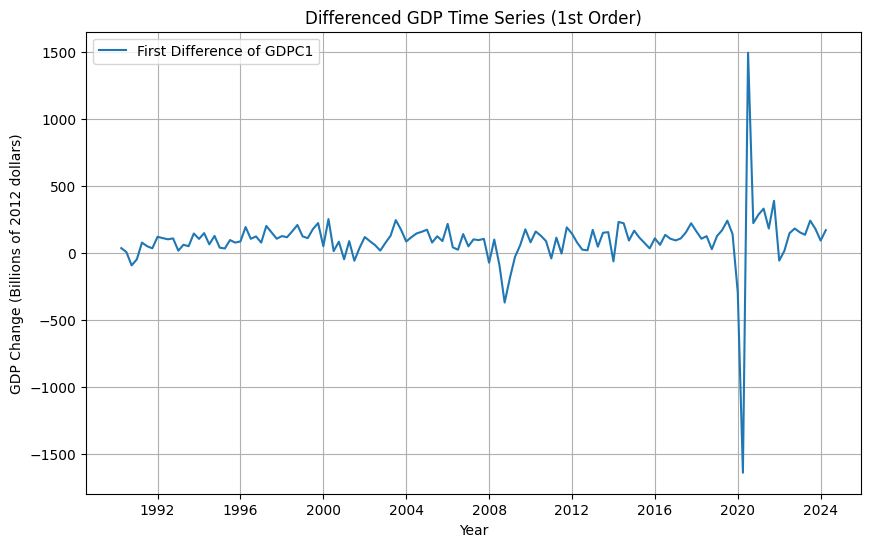

(-13.887208086907643,
 6.059215062934905e-26,
 {'1%': -3.4793722137854926,
  '5%': -2.8830370378332995,
  '10%': -2.578233635380623})

In [10]:
# Apply first-order differencing
gdp_data_diff = df['GDPC1'].diff().dropna()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(gdp_data_diff.index, gdp_data_diff, label='First Difference of GDPC1')
plt.title('Differenced GDP Time Series (1st Order)')
plt.xlabel('Year')
plt.ylabel('GDP Change (Billions of 2012 dollars)')
plt.grid(True)
plt.legend()
plt.show()

# Perform ADF test again on differenced data
adf_test_diff = adfuller(gdp_data_diff)
adf_test_diff[0], adf_test_diff[1], adf_test_diff[4]


<Figure size 1000x600 with 0 Axes>

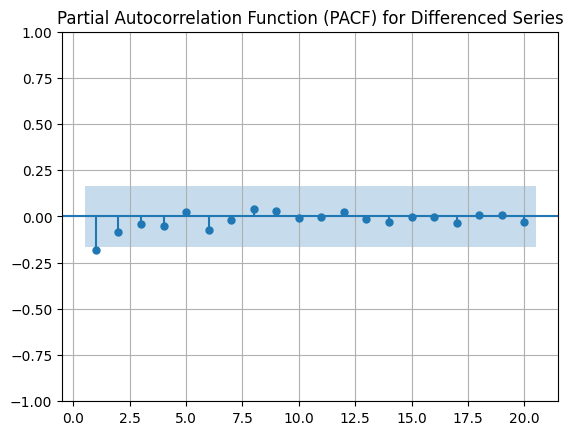

In [13]:
# Plot the Partial Autocorrelation Function (PACF)
plt.figure(figsize=(10, 6))
plot_pacf(gdp_data_diff, lags=20, method='ywm', zero=False)
plt.title('Partial Autocorrelation Function (PACF) for Differenced Series')
plt.grid(True)
plt.show()

In [16]:
# Define ARIMA models with different (p, d, q) parameters
arima_orders = [(1, 1, 0), (1, 1, 1), (2, 1, 1), (1, 1, 2), (2, 1, 2)]

# Fit ARIMA models and collect AIC/BIC values
model_results = []
for order in arima_orders:
    model = ARIMA(df['GDPC1'], order=order)
    fitted_model = model.fit()
    model_results.append({
        'order': order,
        'aic': fitted_model.aic,
        'bic': fitted_model.bic
    })

# Convert results to DF
results_df = pd.DataFrame(model_results)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be use

In [17]:
# Fit the ARIMA model
best_model = ARIMA(df['GDPC1'], order=(1, 1, 2))
fitted_best_model = best_model.fit()

# Model summary
fitted_best_model.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramete

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  GDPC1   No. Observations:                  138
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -928.855
Date:                Thu, 10 Oct 2024   AIC                           1865.709
Time:                        13:35:40   BIC                           1877.389
Sample:                    01-01-1990   HQIC                          1870.456
                         - 04-01-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.000   5506.826      0.000       1.000       1.000
ma.L1         -1.2015      0.033    -35.912      0.000      -1.267      -1.136
ma.L2          0.2025      0.023      8.939      0.000       0.158       0.247
sigma2       4.45e+04   7.87e-07   5.65e+10      0.000    4.45e+04    4.45e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10746.49
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              17.68   Skew:                            -3.98
Prob(H) (two-sided):                  0.00   Kurtosis:                        45.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.22e+25. Standard errors may be unstable.
"""

# Summary
AR(1) coefficient is close to 1, indicating a strong autoregressive effect in the time series.

MA(1) and MA(2) coefficients are statistically significant (from z-scores), suggesting the moving average components help capture the residual errors effectively.

The model's AIC (1865.71) and BIC (1877.39) are relatively low compared to other models, which confirms it as a good fit for the data.